# Classificando gatos e cachorros


In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, Dense
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

Using TensorFlow backend.


### Definindo o modelo

In [2]:
from keras.optimizers import RMSprop

In [3]:
import keras.backend as K

In [4]:
K.image_data_format()

'channels_last'

In [5]:
# Criando modelo
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), padding='same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

# Compilar modelo
model.compile(optimizer = RMSprop(lr=0.0001), loss='binary_crossentropy',
              metrics = ['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
# Carregando imagens e normalizando as imagens 
# Normalziando => imagem = imagem / 255
ger_image_treinamento = ImageDataGenerator(rescale=1./255,
                               rotation_range=7,
                               horizontal_flip= True,
                               shear_range= 0.2, 
                               height_shift_range= 0.07,
                               zoom_range= 0.2)

In [7]:
ger_image_teste = ImageDataGenerator(rescale= 1./255) # Apenas o parametro de normalização

In [8]:
# Criar base de dados de treinamento
base_treinamento = ger_image_treinamento.flow_from_directory('/home/matheusjerico/Documentos/DSA/05. MachineLearning/Cap-12-IntroduçãoDeepLearning/dataset_udemy/dataset/training_set',
                                                             target_size=(64, 64),
                                                             shuffle=True,
                                                             batch_size= 32,
                                                             class_mode= 'binary')

Found 4000 images belonging to 2 classes.


In [9]:
len(base_treinamento)

125

In [44]:
base_teste = ger_image_teste.flow_from_directory('/home/matheusjerico/Documentos/DSA/05. MachineLearning/Cap-12-IntroduçãoDeepLearning/dataset_udemy/dataset/test_set',
                                                target_size= (64, 64),
                                                shuffle= True,
                                                batch_size=32,
                                                class_mode='binary')

Found 1000 images belonging to 2 classes.


In [45]:
len(base_teste)

1

In [188]:
base_treinamento.class_indices

{'cachorro': 0, 'gato': 1}

In [189]:
# Fit no modelo com fit_generator
H=model.fit_generator(base_treinamento, epochs= 20, steps_per_epoch=len(base_treinamento.filenames) // 32,
                    validation_data= base_teste, validation_steps=len(base_teste) // 32)

Epoch 1/20
125/125 [==============================] - 146s 1s/step - loss: 0.7643 - acc: 0.5988 - val_loss: 0.5477 - val_acc: 0.7188
Epoch 2/20
125/125 [==============================] - 145s 1s/step - loss: 0.6448 - acc: 0.6415 - val_loss: 0.7553 - val_acc: 0.5312
Epoch 3/20
125/125 [==============================] - 142s 1s/step - loss: 0.6233 - acc: 0.6595 - val_loss: 0.7646 - val_acc: 0.5625
Epoch 4/20
125/125 [==============================] - 138s 1s/step - loss: 0.5988 - acc: 0.6903 - val_loss: 0.9970 - val_acc: 0.6562
Epoch 5/20
125/125 [==============================] - 134s 1s/step - loss: 0.5755 - acc: 0.7010 - val_loss: 0.8605 - val_acc: 0.5625
Epoch 6/20
125/125 [==============================] - 130s 1s/step - loss: 0.5728 - acc: 0.6963 - val_loss: 0.5526 - val_acc: 0.6562
Epoch 7/20
125/125 [==============================] - 132s 1s/step - loss: 0.5604 - acc: 0.7137 - val_loss: 0.6299 - val_acc: 0.7188
Epoch 8/20
125/125 [==============================] - 128s 1s/step - 

In [1]:
# Score trained model.
scores = model.evaluate_generator(generator=base_treinamento, steps = 32)

NameError: name 'model' is not defined

In [191]:
scores

[0.49886799696832895, 0.77734375]

In [171]:
# Validar passando uma imagem
from keras.preprocessing import image

# carrega a imagem
imagem_teste = image.load_img("/home/matheusjerico/Documentos/DSA/05. MachineLearning/Cap-12-IntroduçãoDeepLearning/dataset_udemy/dataset/test_set/cachorro/dog.3517.jpg",
                              target_size=(64, 64))


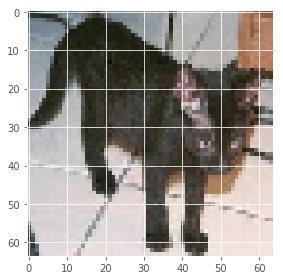

In [134]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

x,y = base_teste.next()

for i in range(0,1):
    image = x[i]
    imshow(image)

In [172]:
print(type(imagem_teste))
imagem_teste = image.img_to_array(imagem_teste)
print(type(imagem_teste))

<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>


In [173]:
# Normalizando a imagem
imagem_teste /= 255.0

In [174]:
# Shape
imagem_teste.shape

(64, 64, 3)

In [175]:
# Colocando a imagem no formato necessário para o modelo
imagem_teste = imagem_teste.reshape(1, imagem_teste.shape[0], imagem_teste.shape[1], imagem_teste.shape[2])
imagem_teste.shape

(1, 64, 64, 3)

In [176]:
# Prevendo
pred = model.predict(imagem_teste)
pred

array([[0.438383]], dtype=float32)

In [177]:
base_treinamento.class_indices

{'cachorro': 0, 'gato': 1}

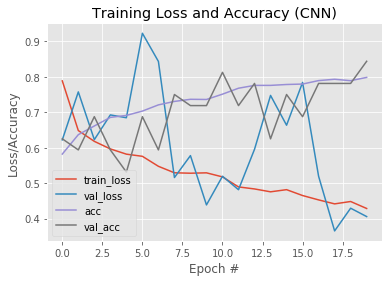

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plocando acc e loss em relação aos epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(H.history['loss'], label='train_loss')
plt.plot(H.history['val_loss'], label='val_loss')
plt.plot(H.history['acc'], label='acc')
plt.plot(H.history['val_acc'], label='val_acc')
plt.title("Training Loss and Accuracy (CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()